# Deep Learning Fundamentals - Part 1

## Colab environment


> When using "!" it's like running on the *terminal*




In [ ]:
!python --version

Python 3.6.9


> With pip list we can check for all the packages that are available. With 'grep' we can check which tensorflow related packages, or pytorch related packages, are available

In [ ]:
!pip list | grep tensor

tensorboard                   2.4.1          
tensorboard-plugin-wit        1.8.0          
tensorboardcolab              0.0.22         
tensorflow                    2.4.1          
tensorflow-addons             0.8.3          
tensorflow-datasets           4.0.1          
tensorflow-estimator          2.4.0          
tensorflow-gcs-config         2.4.0          
tensorflow-hub                0.11.0         
tensorflow-metadata           0.27.0         
tensorflow-privacy            0.2.2          
tensorflow-probability        0.12.1         


In [ ]:
!pip list | grep torch

torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    


> We can check for the GPU. In this case, we don't need it, but we can change our runtime from CPU <-> GPU <-> TPU on Runtime > Change runtime type.

In [ ]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

Tue Feb  9 16:42:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     8W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Basic numerical computing

In [ ]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [ ]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# We can set values of a whole column
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [ ]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

> What numpy did here was casting. As one of the vector is 3x2 and the other one is 2x1, he supposed that you want to add the 2nd vector to each row of the first vector.

In [ ]:
X.shape, x.shape

((3, 2), (2,))

In [ ]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [ ]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

> X shape is 3x2 and x shape is 1x2. For matrix multiplication we need that the nr of columns of the 1st matrix = nr lines of the 2nd matrix, so we need to transpose x.

### Indexing

In [ ]:
X = np.random.rand(3, 2)
X

array([[0.70048342, 0.76259788],
       [0.24602075, 0.94028595],
       [0.02614412, 0.70753655]])

In [ ]:
X > 0.5

array([[ True,  True],
       [False,  True],
       [False,  True]])

In [ ]:
X[X > 0.5] = 1
X

array([[1.        , 1.        ],
       [0.24602075, 1.        ],
       [0.02614412, 1.        ]])

## Basic plotting

In [ ]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

In [ ]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

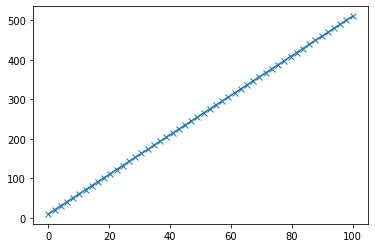

In [ ]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


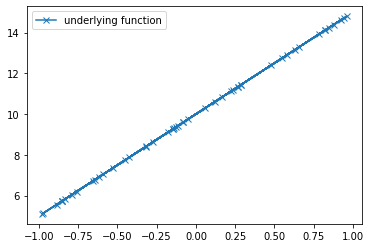

In [ ]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

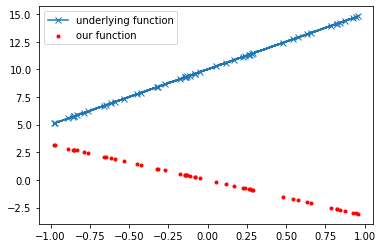

In [ ]:
# Let's initialize our predictions

class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(1)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

### Basic loss function: MSE


In [ ]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 117.69730597913065


### Add back propagation

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros((1))
    # bound = np.sqrt(6 / (input_dim + num_hidden))
    # self.weights = np.random.uniform(-bound, bound, size=(input_dim, num_hidden))
    # self.bias = np.random.uniform(-bound, bound, size=(1,))
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    # print('Linear forward', x.shape, self.weights.shape, output.shape)
    return output

  # y = w*x + b
  # dy/dx = w
  # dy/dw = x
  # dy/db = 1

  def backward(self, gradient):
    # print('Linear backward', gradient.shape, self.x.shape, self.weights.shape, self.bias.shape)
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum()
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

104.11651221839662
68.69108251385131


### Train using gradient descent!

Epoch 0, loss 106.87425666865201
Epoch 5, loss 16.401308525834352
Epoch 10, loss 4.155628086024097
Epoch 15, loss 1.602640239265231
Epoch 20, loss 0.7297668369299793
Epoch 25, loss 0.3472129736514536
Epoch 30, loss 0.1668850785035193
Epoch 35, loss 0.08039438099286997


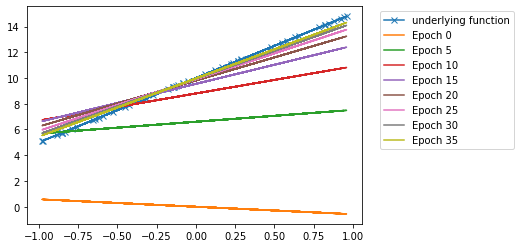

In [ ]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


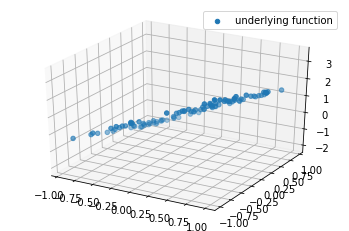

In [ ]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

5.124568634717602


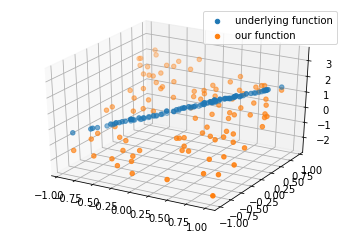

In [ ]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 5.124568634717602
Epoch 1, loss 4.510317344834484
Epoch 2, loss 3.9732434434389483
Epoch 3, loss 3.5025226768609174
Epoch 4, loss 3.089220542423659
Epoch 5, loss 2.72584838607925
Epoch 6, loss 2.406052400259988
Epoch 7, loss 2.1243903214591353
Epoch 8, loss 1.8761668108866667
Epoch 9, loss 1.6573087829143531
Epoch 10, loss 1.46426849139947
Epoch 11, loss 1.2939463628989751
Epoch 12, loss 1.143628244235868
Epoch 13, loss 1.0109334576186912
Epoch 14, loss 0.8937711761893832
Epoch 15, loss 0.7903033660006503
Epoch 16, loss 0.6989130261398948
Epoch 17, loss 0.6181767853244613
Epoch 18, loss 0.5468411369285368
Epoch 19, loss 0.48380175083639854


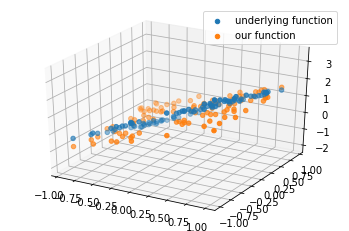

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


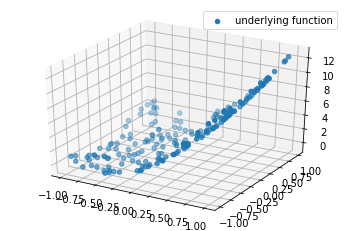

In [ ]:
# Make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 23.437191075044293
Epoch 1, loss 17.6867746588116
Epoch 2, loss 13.720051552080227
Epoch 3, loss 10.939158074033644
Epoch 4, loss 8.954721416364961
Epoch 5, loss 7.511792605829362
Epoch 6, loss 6.442311816251211
Epoch 7, loss 5.634566739705649
Epoch 8, loss 5.013539909355297
Epoch 9, loss 4.528238150843979
Epoch 10, loss 4.14350294710872
Epoch 11, loss 3.8346997854525977
Epoch 12, loss 3.5842599978221084
Epoch 13, loss 3.37941690500171
Epoch 14, loss 3.21071386600839
Epoch 15, loss 3.0710128476124705
Epoch 16, loss 2.954828894880769
Epoch 17, loss 2.857877929651194
Epoch 18, loss 2.776765121785283
Epoch 19, loss 2.708766659963109
Epoch 20, loss 2.6516742086818876
Epoch 21, loss 2.603681949078225
Epoch 22, loss 2.563302958664212
Epoch 23, loss 2.529306131075986
Epoch 24, loss 2.500667731402683
Epoch 25, loss 2.476533576960573
Epoch 26, loss 2.456189081328789
Epoch 27, loss 2.4390352283845
Epoch 28, loss 2.4245690992174476
Epoch 29, loss 2.412367952441232
Epoch 30, loss 2.4

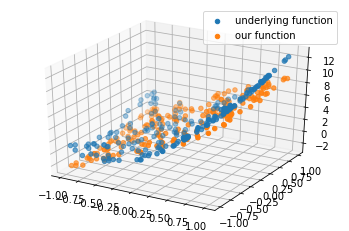

In [ ]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [ ]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

29.17431896940408


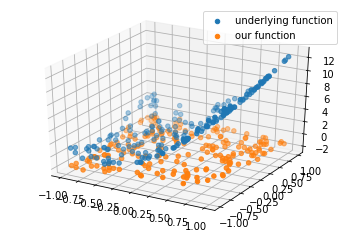

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [ ]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

22.245149068768715
12.389605559148103


Epoch 0, loss 12.389605559148103
Epoch 1, loss 4.93546549026178
Epoch 2, loss 2.8874377872515855
Epoch 3, loss 2.5416073154220444
Epoch 4, loss 3.812792767541586
Epoch 5, loss 1.684242295345057
Epoch 6, loss 1.8155204383374752
Epoch 7, loss 1.231103122368428
Epoch 8, loss 1.1532700312566748
Epoch 9, loss 0.9359698830577137
Epoch 10, loss 0.8518673011328113
Epoch 11, loss 0.7561284821060231
Epoch 12, loss 0.6925995992186219
Epoch 13, loss 0.6378227426142867
Epoch 14, loss 0.5930105242805305
Epoch 15, loss 0.5518528216972015
Epoch 16, loss 0.5173919135476518
Epoch 17, loss 0.48681888804660256
Epoch 18, loss 0.45981895610939716
Epoch 19, loss 0.4358439047109944
Epoch 20, loss 0.4138372481109147
Epoch 21, loss 0.3934896142613377
Epoch 22, loss 0.3754186536231623
Epoch 23, loss 0.35869072470401514
Epoch 24, loss 0.34346032659534087
Epoch 25, loss 0.3294602836911298
Epoch 26, loss 0.3172212026253925
Epoch 27, loss 0.3062852435519523
Epoch 28, loss 0.29681034483964497
Epoch 29, loss 0.2883608

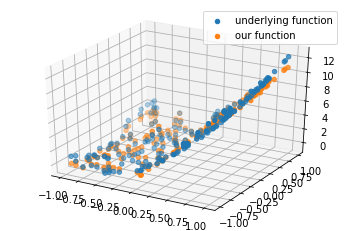

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

tensor(24.9593, grad_fn=<MseLossBackward>)


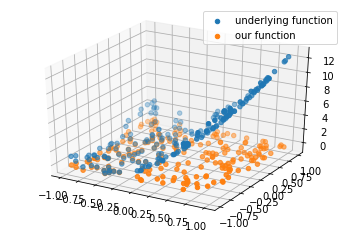

In [ ]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
plot_3d(x_tensor, y_true_tensor, model(x_tensor).detach())

In [ ]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(24.9593, grad_fn=<MseLossBackward>)
tensor(18.5778, grad_fn=<MseLossBackward>)


tensor(18.5778, grad_fn=<MseLossBackward>)
tensor(15.5072, grad_fn=<MseLossBackward>)
tensor(12.6921, grad_fn=<MseLossBackward>)
tensor(9.5549, grad_fn=<MseLossBackward>)
tensor(6.3879, grad_fn=<MseLossBackward>)
tensor(4.0939, grad_fn=<MseLossBackward>)
tensor(2.7209, grad_fn=<MseLossBackward>)
tensor(1.8888, grad_fn=<MseLossBackward>)
tensor(1.4253, grad_fn=<MseLossBackward>)
tensor(1.1671, grad_fn=<MseLossBackward>)
tensor(1.0152, grad_fn=<MseLossBackward>)
tensor(0.9066, grad_fn=<MseLossBackward>)
tensor(0.8223, grad_fn=<MseLossBackward>)
tensor(0.7531, grad_fn=<MseLossBackward>)
tensor(0.6932, grad_fn=<MseLossBackward>)
tensor(0.6412, grad_fn=<MseLossBackward>)
tensor(0.5963, grad_fn=<MseLossBackward>)
tensor(0.5571, grad_fn=<MseLossBackward>)
tensor(0.5230, grad_fn=<MseLossBackward>)
tensor(0.4931, grad_fn=<MseLossBackward>)
tensor(0.4669, grad_fn=<MseLossBackward>)
tensor(0.4439, grad_fn=<MseLossBackward>)
tensor(0.4235, grad_fn=<MseLossBackward>)
tensor(0.4055, grad_fn=<MseLoss

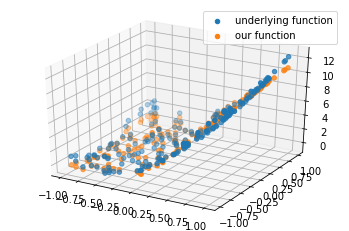

In [ ]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, model(x_tensor).detach())

### Same thing, in Tensorflow/Keras

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 2s 2ms/step - loss: 13.6695
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.9183
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4747
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4559
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7821
Epoc

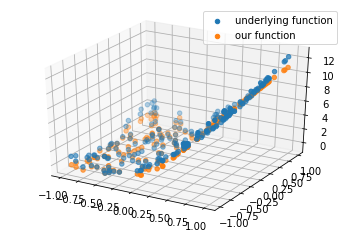

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))

## Next time

We will work on a classification task.